Student id: 24206493

### Task 2: Data Preparation and Analysis

* In your second notebook, load the saved dataset from Task 1 into an appropriate data structure for use as an Analytics Base Table (ABT).
* Apply any data preprocessing steps that might be required to clean, filter or transform the ABT before analysis. Use Markdown cells to explain and justify each preprocessing step.
* Analyse, characterise, and summarise the cleaned ABT, using visualisations where appropriate. Use Markdown cells to explain each step and interpret the results.


Begining with importing pandas library to get a ABT made out of a CSV

In [62]:
import pandas as pd 

In the following steps, I am using pandas read_csv to create a dataframe out of the CSV, I created in Task 1. Post that I am performing some verification checks to see if df is read exactly as the csv in terms of its number of rows and columns, column names.

In [63]:
df = pd.read_csv("final_retriever.csv")

In [64]:
df.shape

(1700, 10)

In [65]:
df.columns

Index(['Make-Model', 'Date of Sale', 'Sale Price', 'Year', 'Mileage',
       'Classification', 'Transmission', 'Fuel Type', 'Description',
       'Sale Location'],
      dtype='object')

Trying to find if make-Model is a unique feature that can be our index. But guess the answer is no as shown below using value_counts() and I am going to go with the default index that pandas provided me with.

In [66]:
df["Make-Model"].value_counts()

Make-Model
Mercedes-Benz C Class (Sport)     16
Mercedes-Benz C Class (C220d)     15
BMW 1 Series (M Sport)            15
Mercedes-Benz E Class (E220d)     14
Volkswagen Tiguan (TDI)           14
                                  ..
BMW X2 (Sport)                     1
BMW X2 (18d)                       1
BMW 4 Series Gran Coupe (428i)     1
Mercedes-Benz E Class (E250)       1
Volkswagen Golf (MHEV)             1
Name: count, Length: 560, dtype: int64

#### Data Preparation Steps:
1. Checking for missing values
2. Checking if the categorical features dont have overlapping values with different names
3. Checking the situation with date ie. what is its type, format etc
4. Checking if the numerical datatypes need to be converted from string datatype for analysis

I am starting with visually checking 2,3,4

In [67]:
df.head(50)

,Make-Model,Date of Sale,Sale Price,Year,Mileage,Classification,Transmission,Fuel Type,Description,Sale Location
0,Audi A1 (TFSI),06/01/2024,"€4,800.00",2012,"130,377",Hatchback,Manual,Petrol,Grey Audi A11.4 TFSI Sport Euro 5 (s/s) 3dr2 p...,Waterford
1,Audi Q7 (S line Plus),07/01/2024,"€14,450.00",2012,"91,483",SUV,Automatic,Diesel,Blue Audi Q73.0 TDI S line Plus Tiptronic quat...,Clare
2,Audi RS3 (TFSI),09/01/2024,"€70,256.00",2022,"3,869",Saloon,Automatic,Petrol,Black Audi RS3 SALOON2.5 RS 3 TFSI QUATTRO VOR...,Mayo
3,Audi A3 (S line),09/01/2024,"€10,308.00",2013,"83,389",Hatchback,Manual,Diesel,Black Audi A32.0 TDI S line Hatchback 3dr Dies...,Limerick
4,Audi A6 Saloon (ultra),2024-01-09,"€21,833.00",2018,"42,918",Saloon,Automatic,Diesel,Red Audi A6 Saloon2.0 TDI Ultra Black Edition ...,Dublin
5,Audi S3 (TFSI),2024-01-09,"€20,345.00",2016,73451,Hatchback,Automatic,Petrol,Blue Audi S32.0 TFSI Sportback 5dr Petrol S Tr...,Laois
6,Audi Q2 (TFSI),10/01/2024,"€27,307.00",2020,"17,520",SUV,Automatic,Petrol,Audi Q2S line 35 TFSI 150 PS S tronic 1.5 5dr,Dublin
7,Audi Q2 (CoD),10/01/2024,"€19,056.00",2018,"60,224",SUV,Automatic,Petrol,Blue Audi Q21.4 TFSI CoD S line S Tronic Euro ...,Donegal
8,Audi TT (TFSI),10/01/2024,"€ 7,166",2009,"55,056",Convertible,Manual,Petrol,Red Audi TT2.0 TFSI Roadster 2dr Petrol Manual...,Dublin
9,Audi Q2 (TFSI),10/01/2024,"€21,153.00",2018,"32,692",SUV,Manual,Petrol,Navy Audi Q2S line 1.4 TFSI cylinder on demand...,Cork


There are issues with date format as suspected. In someplaces it uses a backslash and in some places a hyphen. Also, the the format is irregular, its either DD/MM/YYYY or YYYY/MM/DD. The Mileage values have a comma and so does SalePrice. SalePrice also has a Euro symbol and Mileage has "miles" as a suffix in row 24 which needs to be removed. Another tiny thing is that in row 35, the Classification value SUV is S.U.V. but this could effect our analysis so I need to fix it. Rest of the features seems good to go.

I will start with checking for missing values first.

In [68]:
df.isnull().sum() 

Make-Model        0
Date of Sale      0
Sale Price        0
Year              0
Mileage           0
Classification    0
Transmission      0
Fuel Type         0
Description       0
Sale Location     0
dtype: int64

No missing values found. Moving ahead with fixing mileage, classification, date, sale price irregularities. 

Cleaning mileage values:
1. Check type
2. Strip "miles"
3. Change type to float
4. Ensure type is float and check row 24 for no str suffixes

In [69]:
type(df["Mileage"][0])

str

In [70]:
df["Mileage"] = df["Mileage"].str.rstrip("miles")
df["Mileage"] = df["Mileage"].str.replace(",", "")
df["Mileage"]= df["Mileage"].astype(float)
df["Mileage"].head(30)

0     130377.0
1      91483.0
2       3869.0
3      83389.0
4      42918.0
5      73451.0
6      17520.0
7      60224.0
8      55056.0
9      32692.0
10     10255.0
11     31341.0
12     36368.0
13     89140.0
14     57654.0
15     75898.0
16     41328.0
17     65776.0
18     72177.0
19    118338.0
20    105879.0
21     28311.0
22     22171.0
23     40041.0
24     20457.0
25     48786.0
26      5224.0
27    102434.0
28     22223.0
29     78971.0
Name: Mileage, dtype: float64

Cleaning Classification values:
1. Create a function that changes S.U.V. to SUV and where its SUV keeps it as it is.
2. Apply the function to all values in Classification feature. I got to know about the apply function on StackOverflow. It seems quite efficient.
3. Ensure it has changed (Check Row 35)

In [71]:
def change_suv(s):
    if s == "S.U.V.":
        return "SUV"
    else:
        return s

df['Classification'] = df['Classification'].apply(change_suv)
df['Classification'].head(50)

0       Hatchback
1             SUV
2          Saloon
3       Hatchback
4          Saloon
5       Hatchback
6             SUV
7             SUV
8     Convertible
9             SUV
10            SUV
11      Hatchback
12            SUV
13         Saloon
14         Saloon
15      Hatchback
16         Saloon
17            SUV
18         Estate
19      Hatchback
20            SUV
21            SUV
22         Saloon
23         Saloon
24            SUV
25         Saloon
26      Hatchback
27      Hatchback
28            SUV
29      Hatchback
30    Convertible
31      Hatchback
32            SUV
33    Convertible
34         Estate
35            SUV
36      Hatchback
37          Coupe
38      Hatchback
39            SUV
40            SUV
41      Hatchback
42         Estate
43            SUV
44            SUV
45      Hatchback
46         Estate
47            SUV
48         Saloon
49      Hatchback
Name: Classification, dtype: object

Cleaning Date values:
1. Changing the feature to date-time format using an inbuilt function. It took me a day to figure how this works!
2. Ensure its application

In [72]:
df["Date of Sale"]= pd.to_datetime(df["Date of Sale"] ,format='mixed')

In [73]:
df["Date of Sale"].head(12)

0    2024-06-01
1    2024-07-01
2    2024-09-01
3    2024-09-01
4    2024-01-09
5    2024-01-09
6    2024-10-01
7    2024-10-01
8    2024-10-01
9    2024-10-01
10   2024-01-14
11   2024-01-15
Name: Date of Sale, dtype: datetime64[ns]

Cleaning Sale Price values:
1. Replace comma with nothing
2. Strip the Euro symbol
3. Change the type to float
4. Ensure we have a Sale Price float feature

In [74]:
df["Sale Price"] = df["Sale Price"].str.replace(",", "")
df["Sale Price"] = df["Sale Price"].str.strip("€") 

In [75]:
df["Sale Price"]=df["Sale Price"].astype(float)

In [76]:
df["Sale Price"]

0        4800.0
1       14450.0
2       70256.0
3       10308.0
4       21833.0
         ...   
1695    14075.0
1696    27755.0
1697    13503.0
1698    29262.0
1699    11845.0
Name: Sale Price, Length: 1700, dtype: float64

Checking if our ABT is ready for analysis with all the data cleaning completed

In [77]:
df.head(70)

,Make-Model,Date of Sale,Sale Price,Year,Mileage,Classification,Transmission,Fuel Type,Description,Sale Location
0,Audi A1 (TFSI),2024-06-01,4800.0,2012,130377.0,Hatchback,Manual,Petrol,Grey Audi A11.4 TFSI Sport Euro 5 (s/s) 3dr2 p...,Waterford
1,Audi Q7 (S line Plus),2024-07-01,14450.0,2012,91483.0,SUV,Automatic,Diesel,Blue Audi Q73.0 TDI S line Plus Tiptronic quat...,Clare
2,Audi RS3 (TFSI),2024-09-01,70256.0,2022,3869.0,Saloon,Automatic,Petrol,Black Audi RS3 SALOON2.5 RS 3 TFSI QUATTRO VOR...,Mayo
3,Audi A3 (S line),2024-09-01,10308.0,2013,83389.0,Hatchback,Manual,Diesel,Black Audi A32.0 TDI S line Hatchback 3dr Dies...,Limerick
4,Audi A6 Saloon (ultra),2024-01-09,21833.0,2018,42918.0,Saloon,Automatic,Diesel,Red Audi A6 Saloon2.0 TDI Ultra Black Edition ...,Dublin
...,...,...,...,...,...,...,...,...,...,...
65,Audi A4 Avant (S line Special Edition),2024-02-22,9222.0,2011,96121.0,Estate,Automatic,Diesel,Navy Audi A4 Avant2.7 TDI S line Special Editi...,Waterford
66,Audi A8 (TDI V6),2024-02-22,21323.0,2015,46853.0,Saloon,Automatic,Diesel,Silver Audi A83.0 TDI V6 Sport Executive Saloo...,Dublin
67,Audi Q7 (TDI V6),2024-02-23,45219.0,2019,45120.0,SUV,Automatic,Diesel,Navy Audi Q73.0 TDI V6 50 Black Edition Tiptro...,Kilkenny
68,Audi Q2 (TFSI),2024-02-26,18989.0,2018,54195.0,SUV,Automatic,Petrol,Blue Audi Q21.4 TFSI CoD S line S Tronic Euro ...,Cork


A few other things were in my mind that I wanted to check before jumping to analysis
1. Are all classification and fueltype values unique?
2. Should I create a column that specifies Company Name only? like Audi, BMW, Volkswagen, Mercedes-Benz

So I am going to try checking on these thoughts in next steps

In [78]:
df["Classification"].unique()

array(['Hatchback', 'SUV', 'Saloon', 'Convertible', 'Estate', 'Coupe'],
      dtype=object)

In [79]:
df["Fuel Type"].unique()

array(['Petrol', 'Diesel', 'Electric', 'Petrol Plug-In Hybrid',
       'Diesel Plug-In Hybrid', 'Diesel Hybrid', 'Petrol Hybrid'],
      dtype=object)

Classification and Fuel type do seem unique so lets just go ahead with them at the moment, but I want to create a company name column so I am going ahead with my intuition.

I found two ways to do it. I have commented the first way however that one took me more time so I didnt want to just delete it. Its an honorary mention for me. The second one made me believe I am getting a hang of python and pandas.

In [80]:
# def new_col():
#     comp_name = []
#     for i in df["Make-Model"]:
#         company = i.split(" ")
#         comp_name.append(company[0])
#     return comp_name
# comp_name = new_col()
# df['Company Name'] = comp_name
# df

def new_col(company):
    return company.split(" ")[0]    
df['Company'] = df['Make-Model'].apply(new_col)
df

,Make-Model,Date of Sale,Sale Price,Year,Mileage,Classification,Transmission,Fuel Type,Description,Sale Location,Company
0,Audi A1 (TFSI),2024-06-01,4800.0,2012,130377.0,Hatchback,Manual,Petrol,Grey Audi A11.4 TFSI Sport Euro 5 (s/s) 3dr2 p...,Waterford,Audi
1,Audi Q7 (S line Plus),2024-07-01,14450.0,2012,91483.0,SUV,Automatic,Diesel,Blue Audi Q73.0 TDI S line Plus Tiptronic quat...,Clare,Audi
2,Audi RS3 (TFSI),2024-09-01,70256.0,2022,3869.0,Saloon,Automatic,Petrol,Black Audi RS3 SALOON2.5 RS 3 TFSI QUATTRO VOR...,Mayo,Audi
3,Audi A3 (S line),2024-09-01,10308.0,2013,83389.0,Hatchback,Manual,Diesel,Black Audi A32.0 TDI S line Hatchback 3dr Dies...,Limerick,Audi
4,Audi A6 Saloon (ultra),2024-01-09,21833.0,2018,42918.0,Saloon,Automatic,Diesel,Red Audi A6 Saloon2.0 TDI Ultra Black Edition ...,Dublin,Audi
...,...,...,...,...,...,...,...,...,...,...,...
1695,Volkswagen Tiguan (R-Line),2024-12-19,14075.0,2015,73104.0,SUV,Automatic,Diesel,Volkswagen Tiguan2.0 R LINE TDI BLUEMOTION TEC...,Tipperary,Volkswagen
1696,Volkswagen Tiguan (R-Line),2024-12-20,27755.0,2017,26055.0,SUV,Automatic,Petrol,Volkswagen Tiguan2.0 TSI R-Line DSG 4Motion (s...,Wexford,Volkswagen
1697,Volkswagen Passat (BlueMotion Tech),2024-12-21,13503.0,2015,53236.0,Saloon,Manual,Diesel,Volkswagen Passat2.0 TDI SE Business 4dr2 prev...,Tipperary,Volkswagen
1698,Volkswagen Golf (MHEV),2024-12-22,29262.0,2021,3143.0,Hatchback,Automatic,Petrol Hybrid,Volkswagen Golf1.5 R-LINE ETSI DSG 5d 148 BHP ...,Galway,Volkswagen


### Analysis
I have my ABT ready, cleaned and grouped for analysis now. 
Few questions that I am going to pursue here are:
1. What kind of Fuel-Types are preffered depending on the sale location?
2. What kind of classification are liked depending on the sale location?
3. What does the monthly sales of different counties look like?
4. Summary stats of the numerical features, Sale Price and Mileage. I am exculding Year(Model) which is an ordinal variable like date.
5. Is there any relationship between Sale Price and Mileage?

Since there are 26 counties, I might want to keep it to Top5 as I go forward. I will see how the analysis looks like and decide accordingly

### Fuel-Type vs Sale Location

Using the crosstab method as taught in the class to create a dataframe and then plotting the dataframe using pyplot

In [81]:
pd.crosstab(df["Sale Location"], df["Fuel Type"])

Fuel Type,Diesel,Diesel Hybrid,Diesel Plug-In Hybrid,Electric,Petrol,Petrol Hybrid,Petrol Plug-In Hybrid
Sale Location,,,,,,,
Carlow,14,0,0,0,11,0,0
Cavan,10,0,0,0,12,1,0
Clare,25,0,0,0,18,0,3
Cork,106,6,1,1,91,1,2
Donegal,37,0,0,2,32,0,0
Dublin,236,10,1,8,189,1,8
Galway,45,3,0,0,42,1,1
Kerry,28,0,0,1,18,1,1
Kildare,50,0,0,1,24,0,1


In [82]:
df['Fuel Type'].value_counts()

Fuel Type
Diesel                   922
Petrol                   691
Diesel Hybrid             30
Petrol Plug-In Hybrid     25
Electric                  17
Petrol Hybrid             13
Diesel Plug-In Hybrid      2
Name: count, dtype: int64

From the look at the cross-tab above, it would be prudent to combine the petrol and diesel: hybrid, plug-ins to the main types cause the count is significantly low. I am using the apply+function techique as used above to change that.

In [83]:
def standardising_fueltype(s):
    if s == "Diesel Hybrid" or s ==	"Diesel Plug-In Hybrid":
        return "Diesel"
    elif s == "Petrol Hybrid" or s ==	"Petrol Plug-In Hybrid":
        return "Petrol"
    else:
        return s

df['Fuel Type'] = df['Fuel Type'].apply(standardising_fueltype)
df['Fuel Type'].unique()  #verifiying the change


array(['Petrol', 'Diesel', 'Electric'], dtype=object)

In [84]:
df['Fuel Type'].value_counts() #verifiying the change

Fuel Type
Diesel      954
Petrol      729
Electric     17
Name: count, dtype: int64

I am going ahead with top5 counties wrt Sales from here on for further analysis, main objective is to reduce clutter in visualisation later. Since, Meath and Kildare have same count, I had to choose alphabetically to determine the Top5. These 5 counties cover >50% (920/1700) of the dataset.

In [85]:
(df["Sale Location"]).value_counts()

Sale Location
Dublin       453
Cork         208
Galway        92
Limerick      91
Kildare       76
Meath         76
Donegal       71
Tipperary     62
Wicklow       60
Waterford     51
Kerry         49
Louth         49
Clare         46
Wexford       42
Mayo          39
Kilkenny      31
Laois         30
Carlow        25
Cavan         23
Westmeath     23
Roscommon     22
Sligo         21
Monaghan      18
Offaly        18
Leitrim       16
Longford       8
Name: count, dtype: int64

temp_df is a new dateframe that only has the selected Top5 counties copied from the main df. This is to ensure that the main ABT is preserved in its actual form, incase I need it later

In [86]:
temp_df = pd.DataFrame()
temp_df = df[df["Sale Location"].isin(["Dublin", "Cork", "Galway", "Limerick", "Kildare"])].copy()
temp_df

,Make-Model,Date of Sale,Sale Price,Year,Mileage,Classification,Transmission,Fuel Type,Description,Sale Location,Company
3,Audi A3 (S line),2024-09-01,10308.0,2013,83389.0,Hatchback,Manual,Diesel,Black Audi A32.0 TDI S line Hatchback 3dr Dies...,Limerick,Audi
4,Audi A6 Saloon (ultra),2024-01-09,21833.0,2018,42918.0,Saloon,Automatic,Diesel,Red Audi A6 Saloon2.0 TDI Ultra Black Edition ...,Dublin,Audi
6,Audi Q2 (TFSI),2024-10-01,27307.0,2020,17520.0,SUV,Automatic,Petrol,Audi Q2S line 35 TFSI 150 PS S tronic 1.5 5dr,Dublin,Audi
8,Audi TT (TFSI),2024-10-01,7166.0,2009,55056.0,Convertible,Manual,Petrol,Red Audi TT2.0 TFSI Roadster 2dr Petrol Manual...,Dublin,Audi
9,Audi Q2 (TFSI),2024-10-01,21153.0,2018,32692.0,SUV,Manual,Petrol,Navy Audi Q2S line 1.4 TFSI cylinder on demand...,Cork,Audi
...,...,...,...,...,...,...,...,...,...,...,...
1690,Volkswagen Golf Plus (TSI),2024-12-12,4170.0,2010,100738.0,Hatchback,Manual,Petrol,Blue Volkswagen Golf Plus1.4 TSI SE Euro 5 5dr...,Kildare,Volkswagen
1691,Volkswagen Golf (Life),2024-12-13,23493.0,2021,3238.0,Hatchback,Manual,Petrol,Red Volkswagen Golf1.5 TSI Life 5dr,Galway,Volkswagen
1693,Volkswagen T-Roc (SEL),2024-12-17,19352.0,2018,31420.0,SUV,Manual,Petrol,Blue Volkswagen T-Roc1.5 TSI EVO SEL 5dr,Cork,Volkswagen
1694,Volkswagen Golf (TSI EVO),2024-12-17,16169.0,2018,45253.0,Hatchback,Automatic,Petrol,Blue Volkswagen Golf1.5 SE NAVIGATION TSI EVO ...,Cork,Volkswagen


In [87]:
x = pd.crosstab(temp_df["Fuel Type"], temp_df["Sale Location"])

Importing the matplotlib library and pyplot to start with the visualisations

In [88]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

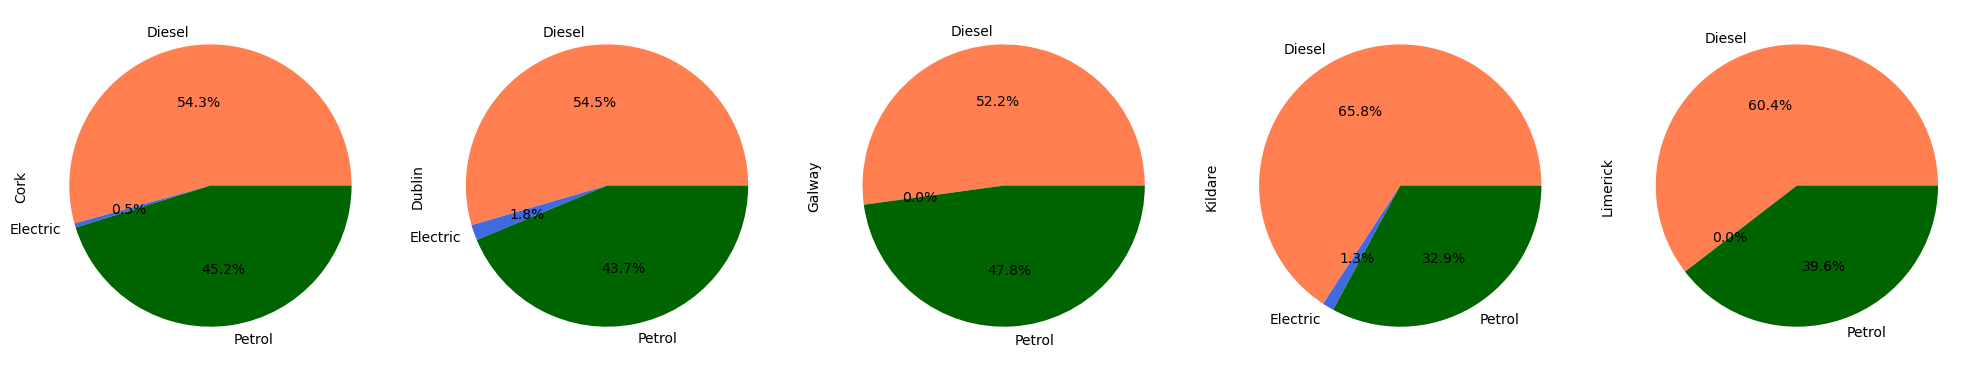

In [89]:
ax = x.plot(kind="pie", figsize=(20,  20), fontsize=10, autopct="%.1f%%", 
                        subplots=True, legend=False, colors=["coral", "royalblue", "darkgreen"])
plt.tight_layout()
plt.show()

Diesel's share in all the counties is higher than Petrols and Electric is sort of bare-minimum. The Petrol cars are trying to catch up however, say <50%. Diesel cars continue to dominate the market, probably due to their fuel efficiency (as stated by PublicPolicy Ireland as well: 
https://publicpolicy.ie/environment/diesel-powered-vehicles-continue-to-dominate-the-irishmarket/#:~:text=Diesel%20engines%20generally%20use%20less,of%20more%20energy%20efficient%20cars.).

Another reason is that before the National Policy framework for Alt Fuels was envisioned for 2017-2030, diesel (and not petrol) was heavily promoted by the government as an efficient fuel, consequently, it dominates the second-hand car market. 

### Classification vs Sale Location

Using the same crosstab method to create a dataframe and then plotting the dataframe using pyplot

In [90]:
df_class  = pd.crosstab(temp_df["Classification"], temp_df["Sale Location"])
df_class

Sale Location,Cork,Dublin,Galway,Kildare,Limerick
Classification,,,,,
Convertible,16,32,7,2,6
Coupe,22,44,10,6,9
Estate,24,34,9,6,9
Hatchback,56,131,28,25,24
SUV,53,128,17,19,25
Saloon,37,84,21,18,18


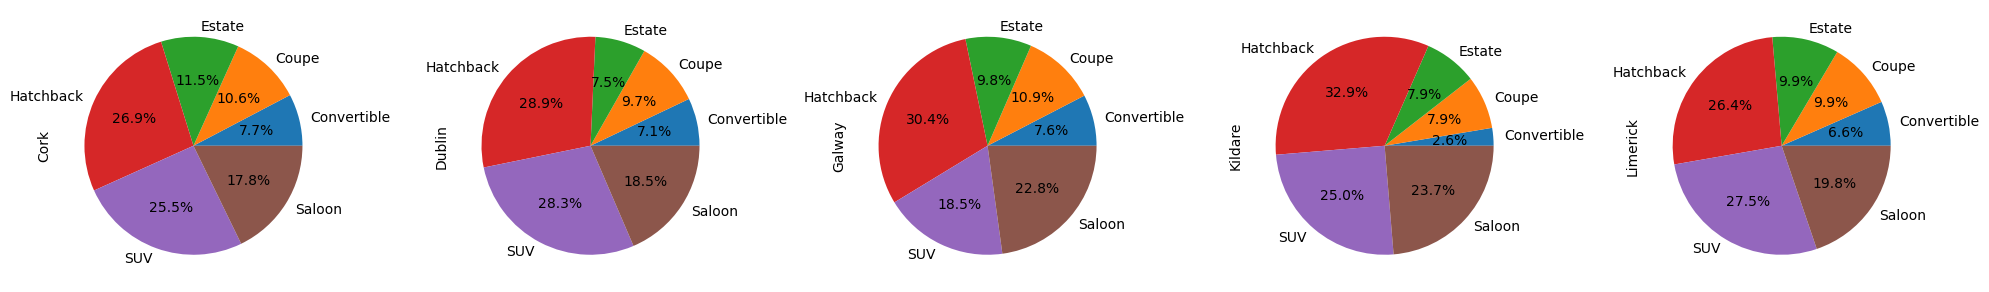

In [91]:
df_class.plot(kind="pie", figsize=(20,  20), fontsize=10, autopct="%.1f%%", 
                        subplots=True, legend=False)
plt.tight_layout() #found this function on GeeksforGeeks
plt.show()

Hatchbacks seem to be loved by everyone followed by SUV>Saloon in these counties. Estate, Coupe and Convertible cover <30% of the markets in all counties. This means that the customers are sensitive to price points. However, it is interesting to note that SUV and hatchback are almost competiting with each other in 4/5 counties which suggests that SUVs are becoming a popular choice. This could be because of SUV has a high floor clearance that seamlessly helps with travel in rural as well as urban areas of Ireland. SUV's are also seen as a style statement, thanks to the marketing companies.
Before this analysis, I was of the opinion that given the housing crisis and corresponding parking space difficulties in Dublin, the hatchbacks would be significantly higher, but that doesn't seem to be the case. I want to check the descriptive stats of SalePrice by Classification to verify my price point argument.

In [92]:
sales_stats = temp_df.groupby("Classification")["Sale Price"].describe()
print(sales_stats)

                count          mean           std     min       25%      50%  \
Classification                                                                 
Convertible      63.0  23955.444444  21815.595845  2743.0   9686.50  15764.0   
Coupe            91.0  24887.505495  22180.333161  2835.0   9134.50  19195.0   
Estate           82.0  21228.804878  16228.900782  2410.0   9773.25  16173.5   
Hatchback       264.0  15963.924242   8360.152208  2758.0   9782.25  14866.5   
SUV             242.0  29187.772727  23406.364018  3364.0  16274.75  22023.5   
Saloon          178.0  20863.016854  14885.402186  1151.0   9467.00  16926.0   

                     75%       max  
Classification                      
Convertible     27886.00  122764.0  
Coupe           34995.00  126127.0  
Estate          27770.25   94385.0  
Hatchback       21183.25   43650.0  
SUV             36105.50  215403.0  
Saloon          27178.00   80309.0  


The price point argument sits well with Hatchbacks and Saloons. However, SUVs have highest mean, min and max but it seems that thats not stopping people to buy them. Its comfort>price for customers in the second hand market.

### Computing Monthly Sales per location

I am going to be using following steps to create this visualisation
1. Extracting month from temp_df's Date of Sale feature for our analysis by using an inbuilt functionality of pandas datetime
2. Verifying the change
3. Creating a crosstab dataframe of Sale Location vs Month
4. Visualising the same using plot functionality

In [93]:
temp_df["Month"] = temp_df["Date of Sale"].dt.to_period("M")

In [94]:
temp_df

,Make-Model,Date of Sale,Sale Price,Year,Mileage,Classification,Transmission,Fuel Type,Description,Sale Location,Company,Month
3,Audi A3 (S line),2024-09-01,10308.0,2013,83389.0,Hatchback,Manual,Diesel,Black Audi A32.0 TDI S line Hatchback 3dr Dies...,Limerick,Audi,2024-09
4,Audi A6 Saloon (ultra),2024-01-09,21833.0,2018,42918.0,Saloon,Automatic,Diesel,Red Audi A6 Saloon2.0 TDI Ultra Black Edition ...,Dublin,Audi,2024-01
6,Audi Q2 (TFSI),2024-10-01,27307.0,2020,17520.0,SUV,Automatic,Petrol,Audi Q2S line 35 TFSI 150 PS S tronic 1.5 5dr,Dublin,Audi,2024-10
8,Audi TT (TFSI),2024-10-01,7166.0,2009,55056.0,Convertible,Manual,Petrol,Red Audi TT2.0 TFSI Roadster 2dr Petrol Manual...,Dublin,Audi,2024-10
9,Audi Q2 (TFSI),2024-10-01,21153.0,2018,32692.0,SUV,Manual,Petrol,Navy Audi Q2S line 1.4 TFSI cylinder on demand...,Cork,Audi,2024-10
...,...,...,...,...,...,...,...,...,...,...,...,...
1690,Volkswagen Golf Plus (TSI),2024-12-12,4170.0,2010,100738.0,Hatchback,Manual,Petrol,Blue Volkswagen Golf Plus1.4 TSI SE Euro 5 5dr...,Kildare,Volkswagen,2024-12
1691,Volkswagen Golf (Life),2024-12-13,23493.0,2021,3238.0,Hatchback,Manual,Petrol,Red Volkswagen Golf1.5 TSI Life 5dr,Galway,Volkswagen,2024-12
1693,Volkswagen T-Roc (SEL),2024-12-17,19352.0,2018,31420.0,SUV,Manual,Petrol,Blue Volkswagen T-Roc1.5 TSI EVO SEL 5dr,Cork,Volkswagen,2024-12
1694,Volkswagen Golf (TSI EVO),2024-12-17,16169.0,2018,45253.0,Hatchback,Automatic,Petrol,Blue Volkswagen Golf1.5 SE NAVIGATION TSI EVO ...,Cork,Volkswagen,2024-12


In [95]:
group1 = pd.crosstab(temp_df["Month"], temp_df["Sale Location"])

In [96]:
group1

Sale Location,Cork,Dublin,Galway,Kildare,Limerick
Month,,,,,
2024-01,18,48,8,3,7
2024-02,21,31,8,6,12
2024-03,12,38,11,7,8
2024-04,18,35,2,6,11
2024-05,19,39,7,6,8
2024-06,18,33,7,6,7
2024-07,22,38,7,1,6
2024-08,15,41,11,4,9
2024-09,20,30,9,9,7


Verifying step by step the indexes, values of group1 and making it plot ready. Line plots are best for visualising trends over time so I will be using them.

In [97]:
group1.index

PeriodIndex(['2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06',
             '2024-07', '2024-08', '2024-09', '2024-10', '2024-11', '2024-12'],
            dtype='period[M]', name='Month')

In [98]:
group1['Cork'].values

array([18, 21, 12, 18, 19, 18, 22, 15, 20, 11, 23, 11])

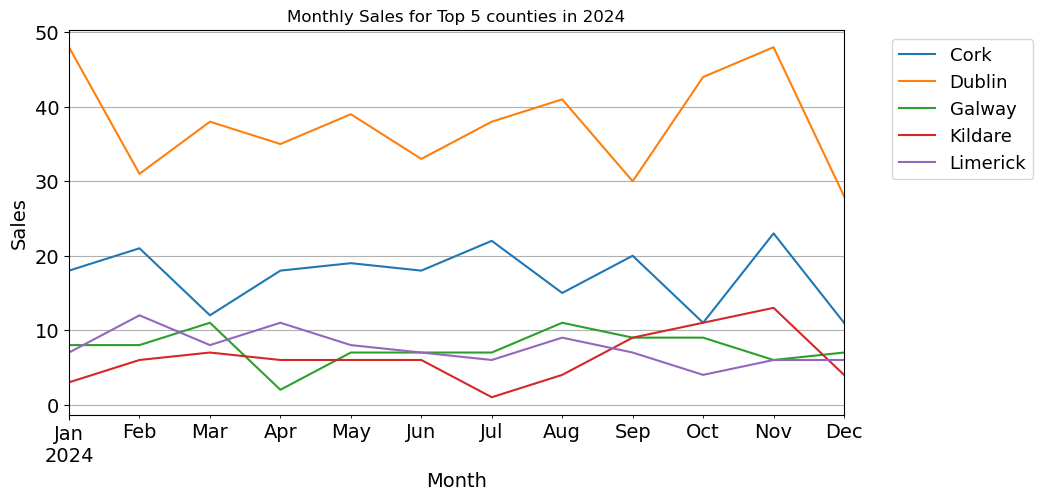

In [99]:
group1.plot(kind = "line", figsize=(10, 5), fontsize=14, title="Monthly Sales for Top 5 counties in 2024")
plt.grid(axis="y")
plt.legend( fontsize=13, bbox_to_anchor=(1.05, 1), loc='upper left') #found bbox_to_anchor and loc functionality on pandas>matplotlib.legend website
plt.xlabel('Month', fontsize=14)
plt.ylabel('Sales', fontsize=14);
plt.show()

The Sales in the top 5 counties over a period of 12 months show that November seems to be the top month for purchase for 3/5 counties. This could be due to festival season being around the corner and the heavy discounts being offered at that point in time. The pattern in general seems quite irregular to draw any other inisghts.

##### Getting the top models - out of curiosity in every brand

In [100]:
temp_df.groupby("Company")["Make-Model"].value_counts().groupby(level=0).head(10)

Company        Make-Model                            
Audi           Audi Q2 (TFSI)                             7
               Audi A5 (TDI)                              7
               Audi A1 (Sport)                            6
               Audi A3 (TFSI)                             6
               Audi TT (TFSI)                             5
               Audi A3 (TDI)                              5
               Audi A4 Avant (TDI)                        5
               Audi A3 (S line)                           5
               Audi Q5 (S line)                           5
               Audi A5 (S line)                           4
BMW            BMW 4 Series Gran Coupe (M Sport)          8
               BMW 1 Series (M Sport)                     8
               BMW X1 (M Sport)                           7
               BMW 3 Series (320i)                        7
               BMW 1 Series (Sport)                       7
               BMW X3 (M Sport)               

#### Another curious attempt to see which model(by year) was preferred for a second hand purchase in 2024

In [101]:
model_sales =temp_df["Year"].value_counts()
model_sales.sort_index(ascending = True, inplace = True)
model_sales

Year
2008     11
2009     29
2010     31
2011     43
2012     47
2013     50
2014     70
2015     92
2016     83
2017     99
2018    100
2019    107
2020     48
2021     75
2022     35
Name: count, dtype: int64

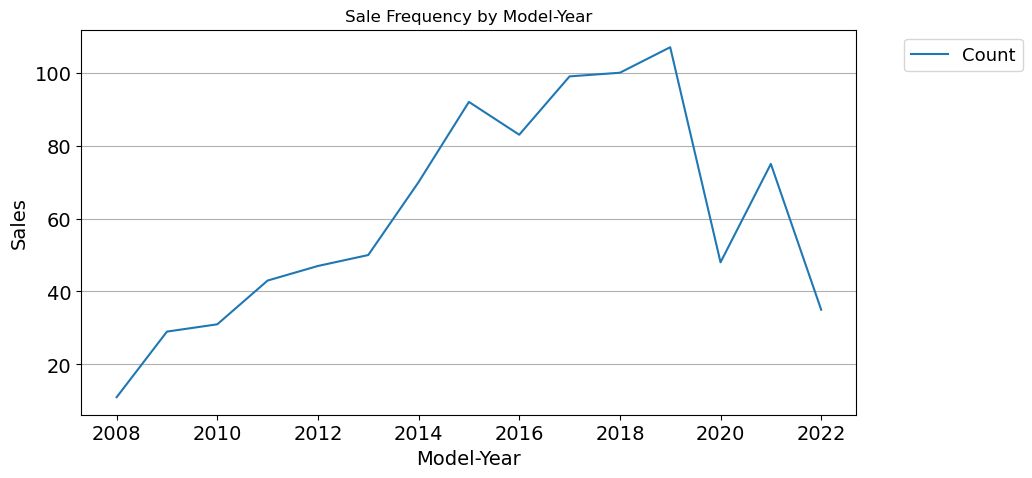

In [102]:
model_sales.plot(kind = "line", figsize=(10, 5), fontsize=14, title = "Sale Frequency by Model-Year")
plt.grid(axis="y")
plt.legend(['Count'],fontsize=13, bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.xlabel('Model-Year', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.show()

The line graph above indicates that in 2024, customers preferred cars from the model years 2017 and 2018 the most, suggesting that 6-7-year-old cars hit the sweet spot. The decline in sales in 2020 can be attributed to COVID-19, after which newer cars were less likely to enter the second-hand market. It would be interesting to determine whether this preference for 6-7-year-old cars is consistent across all classifications or if there are variations. This analysis could provide insights into when people prefer to sell their cars and whether this timeframe differs by vehicle classification.

I plan to create a new column in the dataframe called "Age" to analyze the age of cars sold in 2024 and their corresponding types. I assume that the year the model was launched aligns with the year it was purchased in the full-price market.

In [103]:
temp_df["Age"] = 2024 - temp_df["Year"]

In [104]:
temp_df

,Make-Model,Date of Sale,Sale Price,Year,Mileage,Classification,Transmission,Fuel Type,Description,Sale Location,Company,Month,Age
3,Audi A3 (S line),2024-09-01,10308.0,2013,83389.0,Hatchback,Manual,Diesel,Black Audi A32.0 TDI S line Hatchback 3dr Dies...,Limerick,Audi,2024-09,11
4,Audi A6 Saloon (ultra),2024-01-09,21833.0,2018,42918.0,Saloon,Automatic,Diesel,Red Audi A6 Saloon2.0 TDI Ultra Black Edition ...,Dublin,Audi,2024-01,6
6,Audi Q2 (TFSI),2024-10-01,27307.0,2020,17520.0,SUV,Automatic,Petrol,Audi Q2S line 35 TFSI 150 PS S tronic 1.5 5dr,Dublin,Audi,2024-10,4
8,Audi TT (TFSI),2024-10-01,7166.0,2009,55056.0,Convertible,Manual,Petrol,Red Audi TT2.0 TFSI Roadster 2dr Petrol Manual...,Dublin,Audi,2024-10,15
9,Audi Q2 (TFSI),2024-10-01,21153.0,2018,32692.0,SUV,Manual,Petrol,Navy Audi Q2S line 1.4 TFSI cylinder on demand...,Cork,Audi,2024-10,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1690,Volkswagen Golf Plus (TSI),2024-12-12,4170.0,2010,100738.0,Hatchback,Manual,Petrol,Blue Volkswagen Golf Plus1.4 TSI SE Euro 5 5dr...,Kildare,Volkswagen,2024-12,14
1691,Volkswagen Golf (Life),2024-12-13,23493.0,2021,3238.0,Hatchback,Manual,Petrol,Red Volkswagen Golf1.5 TSI Life 5dr,Galway,Volkswagen,2024-12,3
1693,Volkswagen T-Roc (SEL),2024-12-17,19352.0,2018,31420.0,SUV,Manual,Petrol,Blue Volkswagen T-Roc1.5 TSI EVO SEL 5dr,Cork,Volkswagen,2024-12,6
1694,Volkswagen Golf (TSI EVO),2024-12-17,16169.0,2018,45253.0,Hatchback,Automatic,Petrol,Blue Volkswagen Golf1.5 SE NAVIGATION TSI EVO ...,Cork,Volkswagen,2024-12,6


In [105]:
temp_df["Age"].describe()

count    920.000000
mean       7.853261
std        3.496491
min        2.000000
25%        5.000000
50%        7.000000
75%       10.000000
max       16.000000
Name: Age, dtype: float64

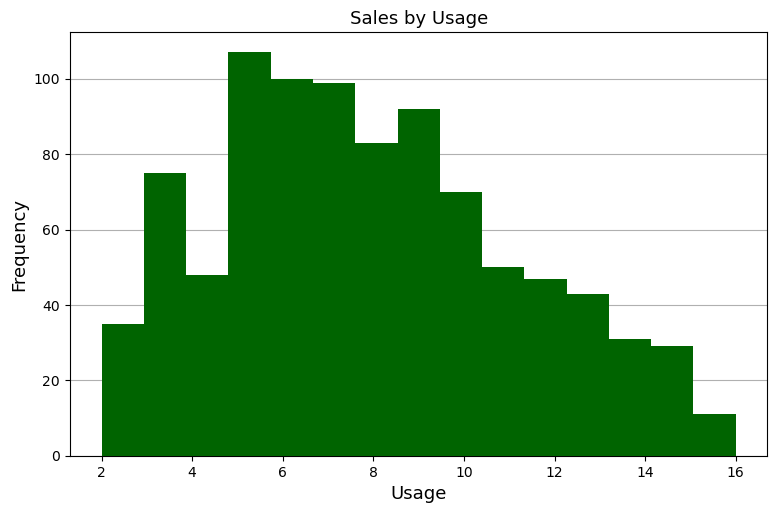

In [106]:
ax = temp_df["Age"].hist(bins=15, figsize=(9, 5.5), color="darkgreen", zorder=3)
plt.grid(axis="x")
plt.title("Sales by Usage", fontsize=13)
plt.xlabel('Usage', fontsize=13)
plt.ylabel('Frequency', fontsize=13);
plt.show()

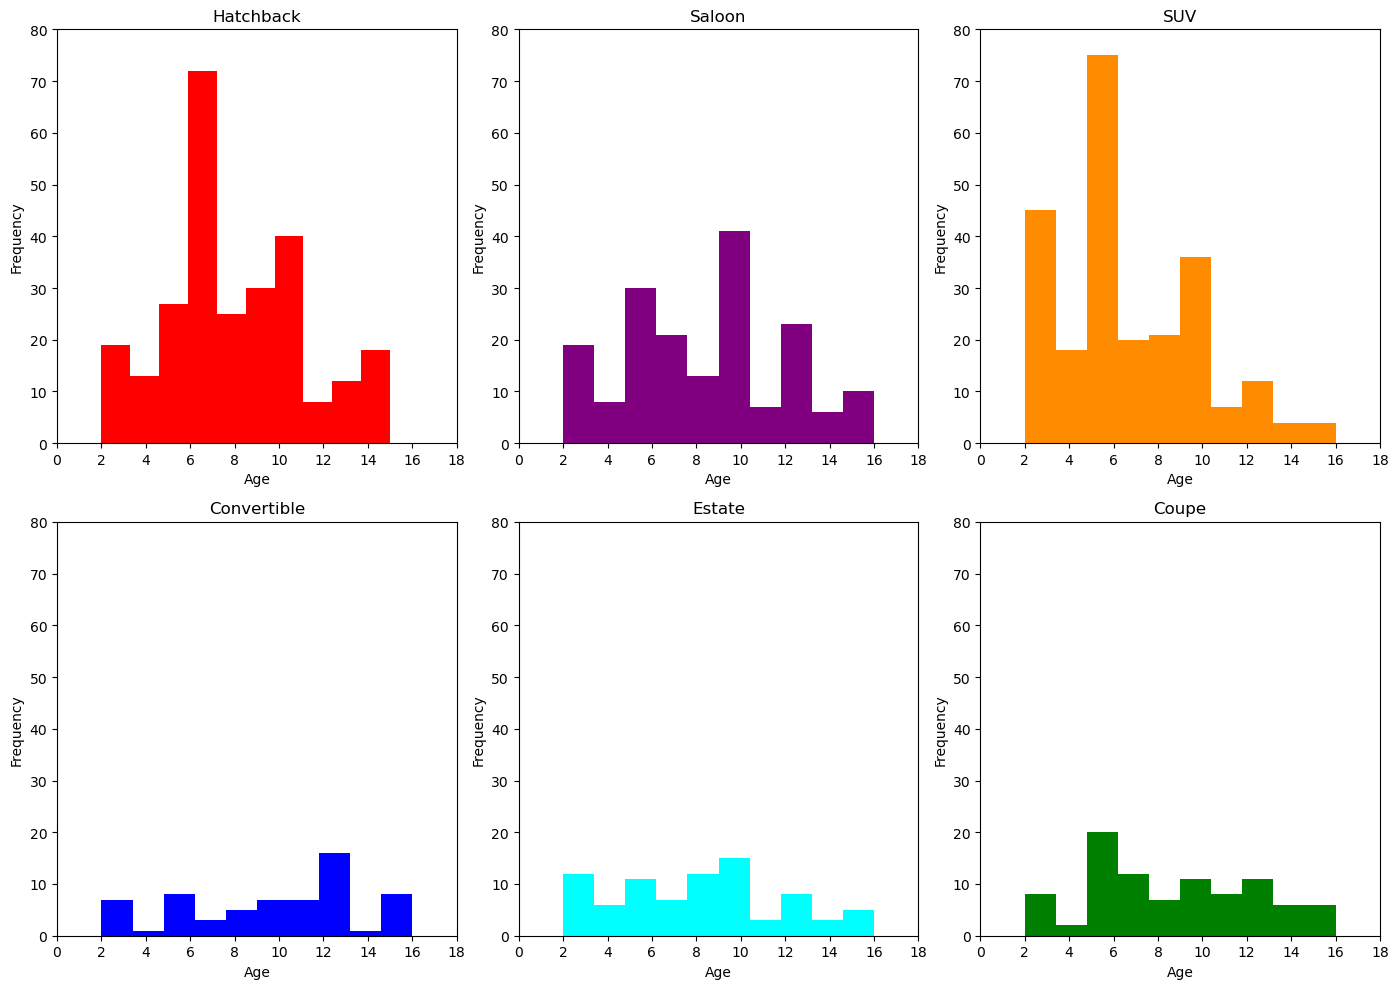

In [107]:
# Create subplots (adjusting rows & cols based on number of classifications)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 10))  # Adjust based on number of categories
#print(axes)
axes = axes.flatten()  # Flatten to make indexing and looping easier
#print(axes)

# Loop through each classification and create scatter plot
for i, classification in enumerate(classifications):
    ax = axes[i]
    subset = temp_df[temp_df["Classification"] == classification]  # Filter for the classification
    ax.hist(subset["Age"], color=color_dict.get(classification, 'black'))
    ax.set_title(f"{classification}")
    ax.set_xlabel("Age")
    ax.set_ylabel("Frequency")
    ax.set_ylim(0, 80)
    ax.set_xlim(0, 18)

# Adjust layout
plt.tight_layout()
plt.show()

From the histograms above, it seems that the Hatchbacks and SUVs do follow 5-7year old trend, where most cars sold are of these ages. Coupes also do seem to be following the same trend, however the overall sale of Coupes is significantly lower than Hatchbacks and SUVs. Saloons are generally put in the market a bit later say after they are 10 years old. Similarly, Convertibles are also sold quite late after using them for >12 years. I think I could benefit from historical data to confidently comment about the trends and predictions here.

### Investigating relationship between Sale Price and Mileage

Since both of them are numerical variables and I dont have a range for them so using Z-score normalisation to prepare these variable values for a scatterplot. I am also creating a new dataframe: SPvsML to conduct this analysis. I would like to keep the main dataframe as it is for integrity purposes. Its also important to note that mileage here refers to the odometer reading of the car.

In [108]:
SPvsML = pd.DataFrame()
mileage_mean = temp_df["Mileage"].mean()  # Z-score normalization 
mileage_std = temp_df["Mileage"].std()
SPvsML["Norm_Mileage"] = (temp_df["Mileage"] - mileage_mean) / mileage_std

In [109]:
saleprice_mean = temp_df["Sale Price"].mean()  # Z-score normalization 
saleprice_std = temp_df["Sale Price"].std()
SPvsML["Norm_Sale Price"] = (temp_df["Sale Price"] - saleprice_mean) / saleprice_std

I want to get the classification in this new dataframe for further analysis like adding color by classification to get a sense of the differences in relationships basis classification.

In [110]:
SPvsML["Classification"] = temp_df["Classification"]

Since, I want to see the relationship + if theres a pattern based on classification, I have created a color dict as a map for my scatter plot

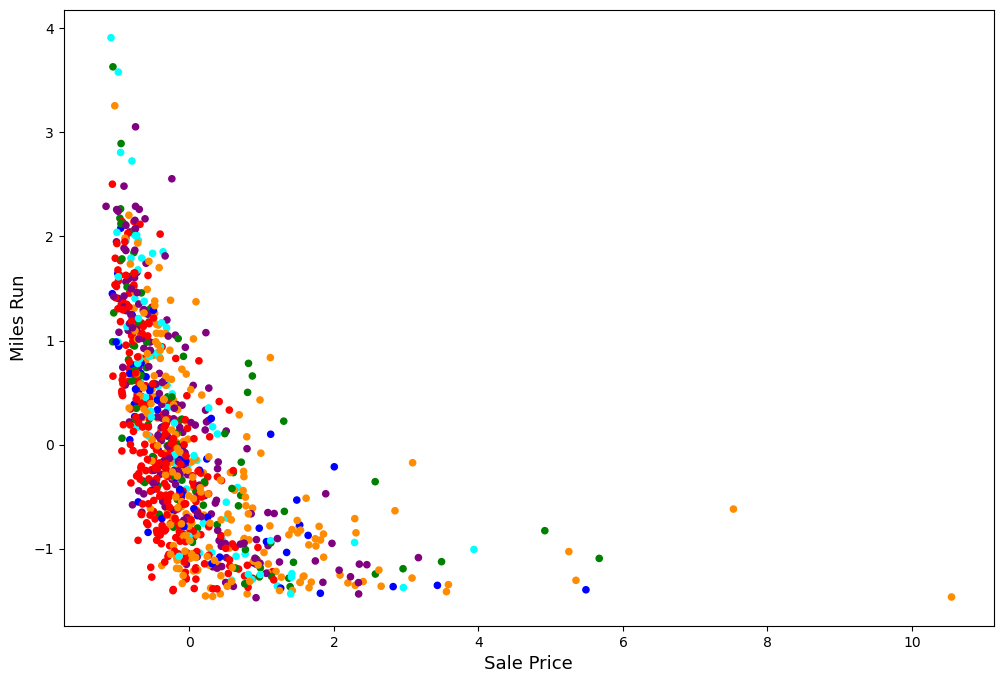

In [111]:
color_dict = {"Hatchback" : "red", "Convertible": "blue", "Coupe": "green", "SUV": "darkorange", "Saloon" : "purple", "Estate": "cyan"}

scat = SPvsML.plot(kind="scatter", x="Norm_Sale Price", y="Norm_Mileage", 
                    c = SPvsML["Classification"].map(color_dict), figsize=(12, 8))
# add axis labels
plt.ylabel('Miles Run', fontsize=13) # changing the label to miles run for better understanding
plt.xlabel('Sale Price', fontsize=13);
plt.show()

From the scatterplot, it seems that as the Miles run by the car increases the Sale Price drops which suggests a typical inverse relationship between the two. We can see a few outliers which are mostly SUVs and Coupes. Being highly pricey to begin with, the customers are willing to pay more for these less-run cars. This could be because of less repairs or maintenance costs. Another insight to note is that the same isnt true in case of hatchbacks. Customers are not willing to pay more even if the hatchbacks are less-run and in good condition. In hatchbacks case, the relationship between Miles Run and Sale Price seems like a vertical line. To probe more into it, I am going to plot the subplots for each classification.

In [112]:
# Get unique classifications
classifications = SPvsML["Classification"].unique()

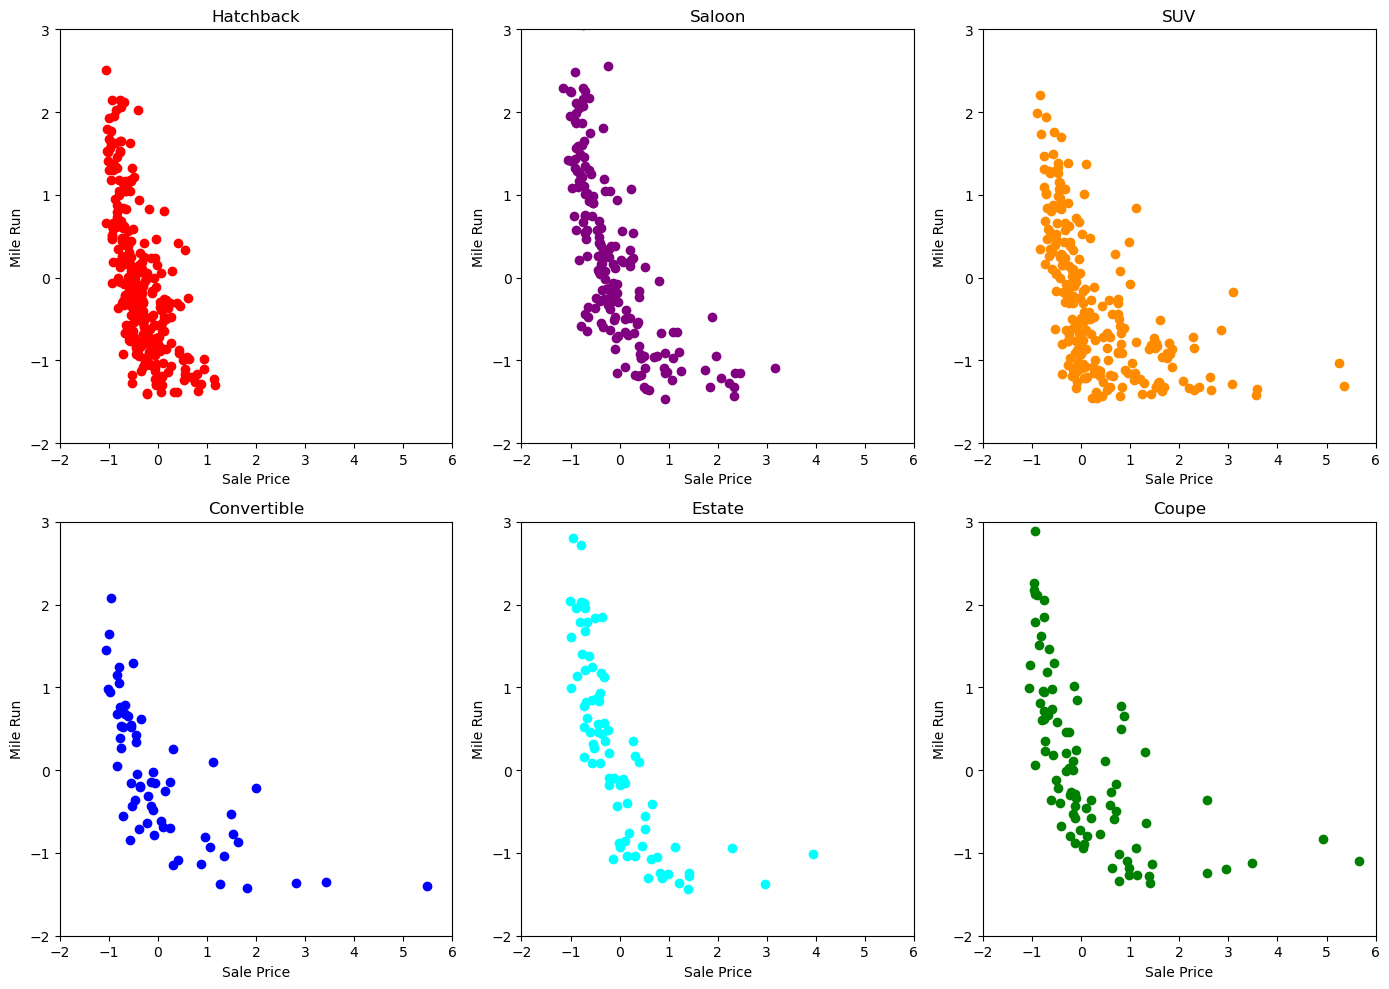

In [113]:
# Create subplots (adjusting rows & cols based on number of classifications)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 10))  # Adjust based on number of categories
#print(axes)
axes = axes.flatten()  # Flatten to make indexing and looping easier
#print(axes)


# Loop through each classification and create scatter plot
for i, classification in enumerate(classifications):
    ax = axes[i]
    subset = SPvsML[SPvsML["Classification"] == classification]  # Filter for the classification
    ax.scatter(subset["Norm_Sale Price"], subset["Norm_Mileage"], color=color_dict.get(classification, 'black'))
    ax.set_title(f"{classification}")
    ax.set_xlabel("Sale Price")
    ax.set_ylabel("Mile Run")
    ax.set_ylim(-2, 3) # I have standardised the axes range cause the graphs get really skewed otherwise
    ax.set_xlim(-2, 6)

# Adjust layout
plt.tight_layout()
plt.show()

As seen in the subplots above, the inverse relationship between the Miles Run and Sale Price is stronger in SUV, Convertible, Estate and Coupe than Hatchbacks and even Saloons. This could be cause if a customer is looking to buy a car that has a cheaper market price, the resale value of this car in the second hand market would go even lower. However, the expensive cars like SUV, Covertible, Estate, Coupe, if are run for less miles, would still resale in the second hand market for a price much higher than the hatchbacks/saloons. 

### Task 3: Discussion

A. At the end of your second notebook, discuss the following aspects of your assignment in Markdown cells:
* Discuss any challenges faced when scraping and cleaning the data.
* Summarise the key insights gained from your analysis of the data.
* Suggest ideas for further work which could be performed on the data (e.g. alternative analyses, integration of other sources of data).


First of all, I really liked the difficulty level of this exam and the way it make me push to learn Python. When I was scraping and cleaning the data from the website, I faced two challenges. Below is the account of that and the way I managed them:
1. Getting the text out of the <td> tag. I couldn't understand how do get the value in the tag without the "class". It took me a bit of a time and a lots of trials and errors to understand that the second td tag is can be accessed by adding one to it. Parsing the data from td_list to dict_car is the highlight of my Task1.
2. Finding a way to clean the date. I used many websites/youtube videos to understand how datetime works with pandas. Although it was so simple but somehow I couldnt make it work. It threw an error with the format. It was only when I mentioned format = mixed it started working for me.

##### Key insights from the analysis: 
The resale market for cars seems to be growing in the favour of SUVs in top 5 counties in Ireland. The customer's prefer cars that are 6-7years old, however, that differs between the classification types. 5-7years old SUVs and Hatchbacks are preferred while the others can go upto 10-12 years of age during resale. November seems to be the highest grossing month in terms of sales, most likely due to festival season and discounts offered. The inverse relationship holds true between Miles Run and Sale Price especially in the case of high-end cars. Diesel cars dominate the second hand market more than petrol while electric is only making its debut.

##### Ideas for further work:
1. I used only 5 counties for my analysis. The same analysis could have been extended to all the counties and then may be figure a pattern between similarly performing counties.
2. It would be interesting to see the Sales by Classification trend over years to confidently assert the growing craze for the SUVs. Similarly, it would be interesting to see and compare the depreciation trend of different vehicle classifications to make resale market predictions 
3. It would also be interesting to see the purchase order data from dealerships that sell new cars and perform a comparative analysis between the resale market and the full price market over the years.

